In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
dataset = datasets.load_breast_cancer()

In [3]:
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [4]:
x_train,x_test,y_train,y_test = train_test_split(dataset.data,dataset.target,test_size = .2,random_state=0)

In [5]:
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
clf.score(x_test,y_test)

0.9385964912280702

In [7]:
clf.score(x_train,y_train)

0.9494505494505494

# finding optimal k for KNN

In [10]:
x_axis=[]
y_axis=[]
for i in range(1,26,2):
    
    x_axis.append(i)
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf,x_train,y_train)
    y_axis.append(score.mean())
    print(i,score.mean())

1 0.9274863483211341
3 0.9296648077146509
5 0.9252788428023702
7 0.9318723132334147
9 0.9318868362960381
11 0.9252788428023702
13 0.9230858603462297
15 0.9120628558150344
17 0.9120628558150344
19 0.9098553502962705
21 0.9142703613337981
23 0.916477866852562
25 0.9098843964215174


# from here we can see that the the best value of k we can get is 9

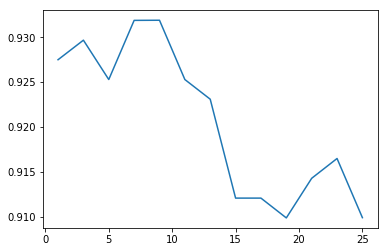

In [12]:
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
plt.show()

In [14]:
print(x_axis)
print(y_axis)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
[0.9274863483211341, 0.9296648077146509, 0.9252788428023702, 0.9318723132334147, 0.9318868362960381, 0.9252788428023702, 0.9230858603462297, 0.9120628558150344, 0.9120628558150344, 0.9098553502962705, 0.9142703613337981, 0.916477866852562, 0.9098843964215174]


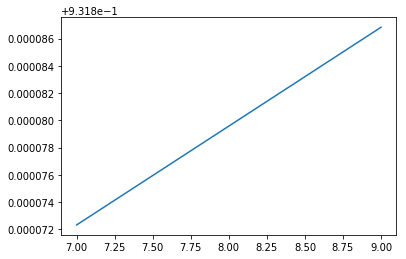

In [16]:
plt.plot([7,9],[0.9318723132334147, 0.9318868362960381])
plt.show()

In [20]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train,y_train)
print(clf.score(x_test,y_test))
print(clf.score(x_train,y_train))

0.9649122807017544
0.9362637362637363
